In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [2]:
folder_path = './'
train_identity = pd.read_csv(f'{folder_path}train_identity.csv')
train_transaction = pd.read_csv(f'{folder_path}train_transaction.csv')
test_identity = pd.read_csv(f'{folder_path}test_identity.csv')
test_transaction = pd.read_csv(f'{folder_path}test_transaction.csv')
#sub = pd.read_csv(f'{folder_path}sample_submission.csv')
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [3]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [4]:
# delete useless variables
del train_identity, train_transaction, test_identity, test_transaction

In [5]:
before=['id-01', 'id-02', 'id-03', 'id-04', 'id-05', 'id-06', 'id-07', 'id-08', 'id-09', 'id-10', 'id-11', 'id-12', 'id-13', 'id-14', 'id-15', 'id-16', 'id-17', 'id-18', 'id-19', 'id-20', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-28', 'id-29', 'id-30', 'id-31', 'id-32', 'id-33', 'id-34', 'id-35', 'id-36', 'id-37', 'id-38']
after = [x.replace('-','_') for x in before]
#print(after)
#Python Convert List to Dictionary: zip()
col_dict = dict(zip(before,after))
#print(col_dict)
test.rename(columns=col_dict, inplace=True, errors='raise')

In [6]:
train['isFraud'].isnull().sum()

0

## Transfer “TransactionDT”
(1) Transfer the unit of 'TransactionDT' from seconds to days
(2) Add a new column 'Trans_hours' transfer the TransactionDT to hours of day

In [7]:
train['TransactionDT'] = (train['TransactionDT']/(60*60*24)).round(0)
train['TransactionDT'].value_counts()

93.0     6917
23.0     6847
25.0     6529
24.0     5868
22.0     5792
         ... 
150.0    2232
144.0    2210
179.0    2064
183.0    2017
1.0      1264
Name: TransactionDT, Length: 183, dtype: int64

In [8]:
test['TransactionDT'] = (test['TransactionDT']/(60*60*24)).round(0)
test['TransactionDT'].value_counts()

390.0    7313
387.0    5714
386.0    4946
385.0    4862
383.0    4650
         ... 
358.0    1923
297.0    1916
255.0    1844
396.0    1719
213.0     551
Name: TransactionDT, Length: 184, dtype: int64

In [9]:
train['Trans_hours'] = (train['TransactionDT']%24).round(0)
train['Trans_hours'].value_counts()

21.0    27292
2.0     26877
5.0     26148
1.0     26117
4.0     25518
6.0     25317
3.0     25268
11.0    24958
10.0    24765
13.0    24712
14.0    24544
20.0    24428
12.0    24391
0.0     24286
9.0     24198
23.0    24154
15.0    24078
7.0     24047
8.0     23993
22.0    23880
19.0    23598
16.0    23015
17.0    22808
18.0    22148
Name: Trans_hours, dtype: int64

In [10]:
test['Trans_hours'] = (test['TransactionDT']%24).round(0)
test['Trans_hours'].value_counts()

6.0     25509
2.0     23967
5.0     23585
3.0     23506
1.0     23094
7.0     23093
0.0     22727
9.0     22387
4.0     22382
23.0    22309
10.0    22195
8.0     22107
11.0    21519
22.0    20414
12.0    19870
21.0    19260
20.0    18975
16.0    18802
18.0    18791
19.0    18784
15.0    18699
17.0    18513
13.0    18152
14.0    18051
Name: Trans_hours, dtype: int64

In [11]:
train.set_index('TransactionID',inplace=True)
test.set_index('TransactionID',inplace=True)

In [12]:
train.head()

isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0            1.0            68.5         W  13926    NaN   
2987001              0            1.0            29.0         W   2755  404.0   
2987002              0            1.0            59.0         W   4663  490.0   
2987003              0            1.0            50.0         W  18132  567.0   
2987004              0            1.0            50.0         H   4497  514.0   

               card3       card4  card5   card6  ...  id_32      id_33  \
TransactionID                                    ...                     
2987000        150.0    discover  142.0  credit  ...    NaN        NaN   
2987001        150.0  mastercard  102.0  credit  ...    NaN        NaN   
2987002        150.0        visa  166.0   debit  ...    NaN        NaN   
2987003        150.0  mastercard  117.0   debit  ...    NaN        NaN   
2987004        150.0  mastercard  102.0  credit  ...   32.0  2220x1080   

                        id_34  id_35 id_36 id_37  id_38  DeviceType  \
TransactionID                                                         
2987000                   NaN    NaN   NaN   NaN    NaN         NaN   
2987001                   NaN    NaN   NaN   NaN    NaN         NaN   
2987002                   NaN    NaN   NaN   NaN    NaN         NaN   
2987003                   NaN    NaN   NaN   NaN    NaN         NaN   
2987004        match_status:2      T     F     T      T      mobile   

                                  DeviceInfo  Trans_hours  
TransactionID                                              
2987000                                  NaN          1.0  
2987001                                  NaN          1.0  
2987002                                  NaN          1.0  
2987003                                  NaN          1.0  
2987004        SAMSUNG SM-G892A Build/NRD90M          1.0  

[5 rows x 434 columns]

## Select features based on the results of preprocessing

In [13]:
bestFeature = ['TransactionAmt','card1', 'card2', 'card3', 'addr1', 'dist1', 'C6',
       'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'V10', 'V170', 'V221',
       'V229', 'V234', 'V242', 'V267', 'V283', 'id_01', 'id_02', 'id_05',
       'id_06', 'id_07', 'id_08', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_24', 'id_25', 'id_26',  'Trans_hours',
       'ProductCD', 'card6', 'P_emaildomain', 'R_emaildomain', 'M4',
       'DeviceType']

In [14]:
features = ['TransactionAmt','card1', 'card2', 'card3', 'addr1', 'dist1', 'C6',
       'C9', 'D1', 'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'V10', 'V170', 'V221',
       'V229', 'V234', 'V242', 'V267', 'V283', 'id_01', 'id_02', 'id_05',
       'id_06', 'id_07', 'id_08', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_24', 'id_25', 'id_26', 'Trans_hours',
       'ProductCD', 'card6', 'P_emaildomain', 'R_emaildomain', 'M4',
       'DeviceType','isFraud']
train = train[features]
train.shape

(590540, 46)

In [15]:
test = test[bestFeature]
test.shape

(506691, 45)

## clean up the features based on their email domain (“P_emaildomain” and “R_emaildomain”)¶


In [16]:
for col in ['P_emaildomain','R_emaildomain']:
    #For train
    train.loc[train[col].isin(['yahoo.co.jp','yahoo.co.uk', 'yahoo.com', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es',
       'yahoo.fr', 'ymail.com']),col] = "Yahoo"
    train.loc[train[col].isin(['gmail','gmail.com']),col] = "Gmail"
    train.loc[train[col].isin(['hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr']),col] = "Hotmail"
    train.loc[train[col].isin(['live.com', 'live.com.mx', 'live.fr']),col] = "Live"
    train.loc[train[col].isin(['outlook.com', 'outlook.es']),col] = "Outlook"
    train.loc[train[col].isin(['netzero.com', 'netzero.net']),col] = "Netzero"
    train.loc[train[col].isin(['frontier.com', 'frontiernet.net']),col] = "Frontiernet"
    # For test
    test.loc[test[col].isin(['yahoo.co.jp','yahoo.co.uk', 'yahoo.com', 'yahoo.com.mx', 'yahoo.de', 'yahoo.es',
       'yahoo.fr', 'ymail.com']),col] = "Yahoo"
    test.loc[test[col].isin(['gmail','gmail.com']),col] = "Gmail"
    test.loc[test[col].isin(['hotmail.co.uk','hotmail.com','hotmail.de', 'hotmail.es', 'hotmail.fr']),col] = "Hotmail"
    test.loc[test[col].isin(['live.com', 'live.com.mx', 'live.fr']),col] = "Live"
    test.loc[test[col].isin(['outlook.com', 'outlook.es']),col] = "Outlook"
    test.loc[test[col].isin(['netzero.com', 'netzero.net']),col] = "Netzero"
    test.loc[test[col].isin(['frontier.com', 'frontiernet.net']),col] = "Frontiernet"

In [17]:
#check
p = train['P_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'servicios-ta.com',
       'suddenlink.net', 'twc.com', 'verizon.net', 'web.de',
       'windstream.net'], dtype=object)

In [18]:
#check
p = test['P_emaildomain'].unique()
p_new = p[~pd.isnull(p)]
p_new.sort()
p_new

array(['Frontiernet', 'Gmail', 'Hotmail', 'Live', 'Netzero', 'Outlook',
       'Yahoo', 'aim.com', 'anonymous.com', 'aol.com', 'att.net',
       'bellsouth.net', 'cableone.net', 'centurylink.net', 'cfl.rr.com',
       'charter.net', 'comcast.net', 'cox.net', 'earthlink.net',
       'embarqmail.com', 'gmx.de', 'icloud.com', 'juno.com', 'mac.com',
       'mail.com', 'me.com', 'msn.com', 'optonline.net', 'prodigy.net.mx',
       'protonmail.com', 'ptd.net', 'q.com', 'roadrunner.com',
       'rocketmail.com', 'sbcglobal.net', 'sc.rr.com', 'scranton.edu',
       'servicios-ta.com', 'suddenlink.net', 'twc.com', 'verizon.net',
       'web.de', 'windstream.net'], dtype=object)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Data columns (total 46 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionAmt  590540 non-null  float64
 1   card1           590540 non-null  int64  
 2   card2           581607 non-null  float64
 3   card3           588975 non-null  float64
 4   addr1           524834 non-null  float64
 5   dist1           238269 non-null  float64
 6   C6              590540 non-null  float64
 7   C9              590540 non-null  float64
 8   D1              589271 non-null  float64
 9   D2              309743 non-null  float64
 10  D3              327662 non-null  float64
 11  D4              421618 non-null  float64
 12  D5              280699 non-null  float64
 13  D10             514518 non-null  float64
 14  D11             311253 non-null  float64
 15  V10             311253 non-null  float64
 16  V170            139819 non-null  float64
 17  V22

In [20]:
train.head()

TransactionAmt  card1  card2  card3  addr1  dist1   C6   C9  \
TransactionID                                                                
2987000                  68.5  13926    NaN  150.0  315.0   19.0  1.0  1.0   
2987001                  29.0   2755  404.0  150.0  325.0    NaN  1.0  0.0   
2987002                  59.0   4663  490.0  150.0  330.0  287.0  1.0  1.0   
2987003                  50.0  18132  567.0  150.0  476.0    NaN  4.0  1.0   
2987004                  50.0   4497  514.0  150.0  420.0    NaN  1.0  0.0   

                  D1     D2  ...  id_25  id_26  Trans_hours  ProductCD  \
TransactionID                ...                                         
2987000         14.0    NaN  ...    NaN    NaN          1.0          W   
2987001          0.0    NaN  ...    NaN    NaN          1.0          W   
2987002          0.0    NaN  ...    NaN    NaN          1.0          W   
2987003        112.0  112.0  ...    NaN    NaN          1.0          W   
2987004          0.0    NaN  ...    NaN    NaN          1.0          H   

                card6  P_emaildomain  R_emaildomain   M4  DeviceType  isFraud  
TransactionID                                                                  
2987000        credit            NaN            NaN   M2         NaN        0  
2987001        credit          Gmail            NaN   M0         NaN        0  
2987002         debit        Outlook            NaN   M0         NaN        0  
2987003         debit          Yahoo            NaN   M0         NaN        0  
2987004        credit          Gmail            NaN  NaN      mobile        0  

[5 rows x 46 columns]

# Using Categorical Data with One Hot Encoding
1. Common strategies for transforming categorical features include feature aggregation, graph-based transformation, or deep-learning approaches such as feature embeddings.
2. one-hot encoding can be applied to nominal variables, in order to improve the performance of the algorithm.

In [21]:
def to_one_hot(dataframe, columns):
    '''
    Convert columns in dataframe to one-hot encoding.
    Args:
        dataframe (dataframe): pandas dataframe containing covariates
        columns (list of strings): list categorical column names to one hot encode
    Returns:
        one_hot_df (dataframe): dataframe with categorical columns encoded
                            as binary variables
    '''
    for col in columns:
        dataframe[col] = dataframe[col].replace([np.nan],'NoValue')  #to keep the information of null 
    one_hot_df = pd.get_dummies(data=dataframe,
               columns=columns,
               drop_first = True
              )
    
    
    return one_hot_df

In [22]:
to_encode = ['ProductCD', 'card6','M4','DeviceType','P_emaildomain','R_emaildomain']
one_hot_train = to_one_hot(train, to_encode)


In [23]:
one_hot_train.head()

TransactionAmt  card1  card2  card3  addr1  dist1   C6   C9  \
TransactionID                                                                
2987000                  68.5  13926    NaN  150.0  315.0   19.0  1.0  1.0   
2987001                  29.0   2755  404.0  150.0  325.0    NaN  1.0  0.0   
2987002                  59.0   4663  490.0  150.0  330.0  287.0  1.0  1.0   
2987003                  50.0  18132  567.0  150.0  476.0    NaN  4.0  1.0   
2987004                  50.0   4497  514.0  150.0  420.0    NaN  1.0  0.0   

                  D1     D2  ...  R_emaildomain_rocketmail.com  \
TransactionID                ...                                 
2987000         14.0    NaN  ...                             0   
2987001          0.0    NaN  ...                             0   
2987002          0.0    NaN  ...                             0   
2987003        112.0  112.0  ...                             0   
2987004          0.0    NaN  ...                             0   

               R_emaildomain_sbcglobal.net  R_emaildomain_sc.rr.com  \
TransactionID                                                         
2987000                                  0                        0   
2987001                                  0                        0   
2987002                                  0                        0   
2987003                                  0                        0   
2987004                                  0                        0   

               R_emaildomain_scranton.edu  R_emaildomain_servicios-ta.com  \
TransactionID                                                               
2987000                                 0                               0   
2987001                                 0                               0   
2987002                                 0                               0   
2987003                                 0                               0   
2987004                                 0                               0   

               R_emaildomain_suddenlink.net  R_emaildomain_twc.com  \
TransactionID                                                        
2987000                                   0                      0   
2987001                                   0                      0   
2987002                                   0                      0   
2987003                                   0                      0   
2987004                                   0                      0   

               R_emaildomain_verizon.net  R_emaildomain_web.de  \
TransactionID                                                    
2987000                                0                     0   
2987001                                0                     0   
2987002                                0                     0   
2987003                                0                     0   
2987004                                0                     0   

               R_emaildomain_windstream.net  
TransactionID                                
2987000                                   0  
2987001                                   0  
2987002                                   0  
2987003                                   0  
2987004                                   0  

[5 rows x 138 columns]

In [24]:
one_hot_train['R_emaildomain_twc.com'].value_counts()

0    590511
1        29
Name: R_emaildomain_twc.com, dtype: int64

In [25]:
del train

In [26]:
one_hot_train['isFraud'].isnull().sum()

0

## Tackling Class imbalance

/Users/wanlin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Target variable count')

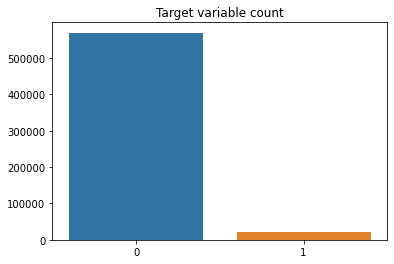

In [27]:
%matplotlib inline
x=one_hot_train['isFraud'].value_counts().values
sns.barplot([0,1],x)
plt.title('Target variable count')

In [28]:
one_hot_train['isFraud'].value_counts().values

array([569877,  20663])

## (1) split the train dataset into train and validation set

In [29]:
# We now split the train dataset into train and validation set.
# We keeep 20% of data for validation.
from sklearn.model_selection import train_test_split
X = one_hot_train.drop('isFraud', axis = 1)
y = one_hot_train['isFraud']
X_train,X_validation,y_train,y_validation =train_test_split(X,y,test_size=.2,random_state=1)

In [30]:
print('X_train: ',X_train.shape)
print('y_train: ',y_train.shape)
print('X_validation: ',X_validation.shape)
print('y_validation: ',y_validation.shape)

X_train:  (472432, 137)
y_train:  (472432,)
X_validation:  (118108, 137)
y_validation:  (118108,)


In [31]:
df_train = pd.concat([X_train,y_train],axis=1)
df_train.shape

(472432, 138)

In [32]:
df_validation = pd.concat([X_validation,y_validation],axis=1)
df_validation.shape

(118108, 138)

In [33]:
del X_train,X_validation

In [34]:
df_train['isFraud'].isnull().sum()

0

## (2) Undersample majority class 

In [35]:
not_fraud=df_train[df_train.isFraud==0]
fraud=df_train[df_train.isFraud==1]

from sklearn.utils import resample

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 2) # reproducible results

# combine minority and downsampled majority
train_downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
train_downsampled.isFraud.value_counts()

1    16529
0    16529
Name: isFraud, dtype: int64

In [36]:
not_fraud=df_validation[df_validation.isFraud==0]
fraud=df_validation[df_validation.isFraud==1]

from sklearn.utils import resample

not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 2) # reproducible results

# combine minority and downsampled majority
validation_downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
validation_downsampled.isFraud.value_counts()

1    4134
0    4134
Name: isFraud, dtype: int64

In [37]:
validation_downsampled.head()

TransactionAmt  card1  card2  card3  addr1  dist1   C6   C9  \
TransactionID                                                                
3364111                 62.95  13956  193.0  150.0  205.0    NaN  2.0  1.0   
3381032                169.00   6692  555.0  150.0  485.0    NaN  1.0  1.0   
3357089                390.00  10476  298.0  150.0  330.0    2.0  5.0  2.0   
3007781                 40.00   5938  111.0  150.0  264.0    NaN  1.0  0.0   
3575777                 98.95   4436  174.0  150.0  337.0   12.0  1.0  2.0   

                  D1     D2  ...  R_emaildomain_sbcglobal.net  \
TransactionID                ...                                
3364111        452.0  452.0  ...                            0   
3381032          0.0    NaN  ...                            0   
3357089          5.0    5.0  ...                            0   
3007781          0.0    NaN  ...                            0   
3575777         78.0   78.0  ...                            0   

               R_emaildomain_sc.rr.com  R_emaildomain_scranton.edu  \
TransactionID                                                        
3364111                              0                           0   
3381032                              0                           0   
3357089                              0                           0   
3007781                              0                           0   
3575777                              0                           0   

               R_emaildomain_servicios-ta.com  R_emaildomain_suddenlink.net  \
TransactionID                                                                 
3364111                                     0                             0   
3381032                                     0                             0   
3357089                                     0                             0   
3007781                                     0                             0   
3575777                                     0                             0   

               R_emaildomain_twc.com  R_emaildomain_verizon.net  \
TransactionID                                                     
3364111                            0                          0   
3381032                            0                          0   
3357089                            0                          0   
3007781                            0                          0   
3575777                            0                          0   

               R_emaildomain_web.de  R_emaildomain_windstream.net  isFraud  
TransactionID                                                               
3364111                           0                             0        0  
3381032                           0                             0        0  
3357089                           0                             0        0  
3007781                           0                             0        0  
3575777                           0                             0        0  

[5 rows x 138 columns]

In [38]:
del df_validation, df_train

In [39]:
train_downsampled['isFraud'].isnull().sum()

0

## Normalize the continuous features to make sure they're on the same scale. 
We should normalize the test data using statistics from the train data.

In [40]:
X_train = train_downsampled.drop('isFraud', axis = 1)
y_train = train_downsampled['isFraud']

In [41]:
X_validation = validation_downsampled.drop('isFraud', axis = 1)
y_validation = validation_downsampled['isFraud']

In [42]:
#X_train.columns.values

In [43]:
continuous_columns = ['card1', 'card2', 'card3', 'addr1', 'dist1', 'C6', 'C9', 'D1',
       'D2', 'D3', 'D4', 'D5', 'D10', 'D11', 'V10', 'V170', 'V221',
       'V229', 'V234', 'V242', 'V267', 'V283', 'id_01', 'id_02', 'id_05',
       'id_06', 'id_07', 'id_08', 'id_13', 'id_14', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_24', 'id_25', 'id_26', 'Trans_hours']
mean = X_train.loc[:, continuous_columns].mean()
std = X_train.loc[:, continuous_columns].std()
X_train.loc[:, continuous_columns] = (X_train.loc[:, continuous_columns] - mean) / std
X_validation.loc[:, continuous_columns] = (X_validation.loc[:, continuous_columns] - mean) / std



In [44]:
X_train.head()

TransactionAmt     card1     card2     card3     addr1  \
TransactionID                                                           
3105998                 59.00 -0.573863 -1.593970 -0.500408  1.456291   
3237798                261.95  0.592296  0.249443 -0.500408  0.369647   
3370911                117.00 -0.275076  0.790513 -0.500408  0.320699   
3009683                100.00  1.545805 -0.272752 -0.500408 -1.666585   
3012010                300.00 -0.082718 -1.593970 -0.500408 -0.991104   

                  dist1        C6        C9        D1        D2  ...  \
TransactionID                                                    ...   
3105998             NaN -0.116042 -0.233365 -0.494284       NaN  ...   
3237798       -0.334594 -0.116042 -0.078037  3.392809  2.384281  ...   
3370911             NaN -0.095679 -0.000374 -0.494284       NaN  ...   
3009683             NaN -0.116042 -0.155701 -0.420943 -0.741261  ...   
3012010             NaN -0.105861 -0.078037 -0.076239 -0.458760  ...   

               R_emaildomain_rocketmail.com  R_emaildomain_sbcglobal.net  \
TransactionID                                                              
3105998                                   0                            0   
3237798                                   0                            0   
3370911                                   0                            0   
3009683                                   0                            0   
3012010                                   0                            0   

               R_emaildomain_sc.rr.com  R_emaildomain_scranton.edu  \
TransactionID                                                        
3105998                              0                           0   
3237798                              0                           0   
3370911                              0                           0   
3009683                              0                           0   
3012010                              0                           0   

               R_emaildomain_servicios-ta.com  R_emaildomain_suddenlink.net  \
TransactionID                                                                 
3105998                                     0                             0   
3237798                                     0                             0   
3370911                                     0                             0   
3009683                                     0                             0   
3012010                                     0                             0   

               R_emaildomain_twc.com  R_emaildomain_verizon.net  \
TransactionID                                                     
3105998                            0                          0   
3237798                            0                          0   
3370911                            0                          0   
3009683                            0                          0   
3012010                            0                          0   

               R_emaildomain_web.de  R_emaildomain_windstream.net  
TransactionID                                                      
3105998                           0                             0  
3237798                           0                             0  
3370911                           0                             0  
3009683                           0                             0  
3012010                           0                             0  

[5 rows x 137 columns]

In [45]:
X_validation.head()

TransactionAmt     card1     card2     card3     addr1  \
TransactionID                                                           
3364111                 62.95  0.876589 -1.078066 -0.500408 -0.854050   
3381032                169.00 -0.627492  1.199461 -0.500408  1.887032   
3357089                390.00  0.156022 -0.417457 -0.500408  0.369647   
3007781                 40.00 -0.783615 -1.593970 -0.500408 -0.276465   
3575777                 98.95 -1.094618 -1.197605 -0.500408  0.438174   

                  dist1        C6        C9        D1        D2  ...  \
TransactionID                                                    ...   
3364111             NaN -0.105861 -0.155701  2.820746  1.915450  ...   
3381032             NaN -0.116042 -0.155701 -0.494284       NaN  ...   
3357089       -0.350130 -0.075317 -0.078037 -0.457614 -0.771315  ...   
3007781             NaN -0.116042 -0.233365 -0.494284       NaN  ...   
3575777       -0.324236 -0.116042 -0.078037  0.077778 -0.332537  ...   

               R_emaildomain_rocketmail.com  R_emaildomain_sbcglobal.net  \
TransactionID                                                              
3364111                                   0                            0   
3381032                                   0                            0   
3357089                                   0                            0   
3007781                                   0                            0   
3575777                                   0                            0   

               R_emaildomain_sc.rr.com  R_emaildomain_scranton.edu  \
TransactionID                                                        
3364111                              0                           0   
3381032                              0                           0   
3357089                              0                           0   
3007781                              0                           0   
3575777                              0                           0   

               R_emaildomain_servicios-ta.com  R_emaildomain_suddenlink.net  \
TransactionID                                                                 
3364111                                     0                             0   
3381032                                     0                             0   
3357089                                     0                             0   
3007781                                     0                             0   
3575777                                     0                             0   

               R_emaildomain_twc.com  R_emaildomain_verizon.net  \
TransactionID                                                     
3364111                            0                          0   
3381032                            0                          0   
3357089                            0                          0   
3007781                            0                          0   
3575777                            0                          0   

               R_emaildomain_web.de  R_emaildomain_windstream.net  
TransactionID                                                      
3364111                           0                             0  
3381032                           0                             0  
3357089                           0                             0  
3007781                           0                             0  
3575777                           0                             0  

[5 rows x 137 columns]

In [46]:
X_train.shape

(33058, 137)

In [47]:
X_validation.shape

(8268, 137)

In [48]:
X_train.index

Int64Index([3105998, 3237798, 3370911, 3009683, 3012010, 3343010, 3313328,
            3226851, 2996702, 3431280,
            ...
            3069237, 3250344, 3133279, 3321805, 3166151, 3065896, 3215120,
            3159423, 2987243, 3060349],
           dtype='int64', name='TransactionID', length=33058)

## Missing value imputation

In [49]:
# Impute values using the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train_mean_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_mean_imputed = pd.DataFrame(imputer.transform(X_validation), columns=X_validation.columns, index =X_validation.index)

In [50]:
X_train_mean_imputed.head()

TransactionAmt     card1     card2     card3     addr1  \
TransactionID                                                           
3105998                 59.00 -0.573863 -1.593970 -0.500408  1.456291   
3237798                261.95  0.592296  0.249443 -0.500408  0.369647   
3370911                117.00 -0.275076  0.790513 -0.500408  0.320699   
3009683                100.00  1.545805 -0.272752 -0.500408 -1.666585   
3012010                300.00 -0.082718 -1.593970 -0.500408 -0.991104   

                      dist1        C6        C9        D1            D2  ...  \
TransactionID                                                            ...   
3105998        2.681165e-17 -0.116042 -0.233365 -0.494284 -5.786410e-17  ...   
3237798       -3.345936e-01 -0.116042 -0.078037  3.392809  2.384281e+00  ...   
3370911        2.681165e-17 -0.095679 -0.000374 -0.494284 -5.786410e-17  ...   
3009683        2.681165e-17 -0.116042 -0.155701 -0.420943 -7.412614e-01  ...   
3012010        2.681165e-17 -0.105861 -0.078037 -0.076239 -4.587604e-01  ...   

               R_emaildomain_rocketmail.com  R_emaildomain_sbcglobal.net  \
TransactionID                                                              
3105998                                 0.0                          0.0   
3237798                                 0.0                          0.0   
3370911                                 0.0                          0.0   
3009683                                 0.0                          0.0   
3012010                                 0.0                          0.0   

               R_emaildomain_sc.rr.com  R_emaildomain_scranton.edu  \
TransactionID                                                        
3105998                            0.0                         0.0   
3237798                            0.0                         0.0   
3370911                            0.0                         0.0   
3009683                            0.0                         0.0   
3012010                            0.0                         0.0   

               R_emaildomain_servicios-ta.com  R_emaildomain_suddenlink.net  \
TransactionID                                                                 
3105998                                   0.0                           0.0   
3237798                                   0.0                           0.0   
3370911                                   0.0                           0.0   
3009683                                   0.0                           0.0   
3012010                                   0.0                           0.0   

               R_emaildomain_twc.com  R_emaildomain_verizon.net  \
TransactionID                                                     
3105998                          0.0                        0.0   
3237798                          0.0                        0.0   
3370911                          0.0                        0.0   
3009683                          0.0                        0.0   
3012010                          0.0                        0.0   

               R_emaildomain_web.de  R_emaildomain_windstream.net  
TransactionID                                                      
3105998                         0.0                           0.0  
3237798                         0.0                           0.0  
3370911                         0.0                           0.0  
3009683                         0.0                           0.0  
3012010                         0.0                           0.0  

[5 rows x 137 columns]

In [51]:
X_val_mean_imputed.head()

TransactionAmt     card1     card2     card3     addr1  \
TransactionID                                                           
3364111                 62.95  0.876589 -1.078066 -0.500408 -0.854050   
3381032                169.00 -0.627492  1.199461 -0.500408  1.887032   
3357089                390.00  0.156022 -0.417457 -0.500408  0.369647   
3007781                 40.00 -0.783615 -1.593970 -0.500408 -0.276465   
3575777                 98.95 -1.094618 -1.197605 -0.500408  0.438174   

                      dist1        C6        C9        D1            D2  ...  \
TransactionID                                                            ...   
3364111        2.681165e-17 -0.105861 -0.155701  2.820746  1.915450e+00  ...   
3381032        2.681165e-17 -0.116042 -0.155701 -0.494284 -5.786410e-17  ...   
3357089       -3.501302e-01 -0.075317 -0.078037 -0.457614 -7.713147e-01  ...   
3007781        2.681165e-17 -0.116042 -0.233365 -0.494284 -5.786410e-17  ...   
3575777       -3.242359e-01 -0.116042 -0.078037  0.077778 -3.325366e-01  ...   

               R_emaildomain_rocketmail.com  R_emaildomain_sbcglobal.net  \
TransactionID                                                              
3364111                                 0.0                          0.0   
3381032                                 0.0                          0.0   
3357089                                 0.0                          0.0   
3007781                                 0.0                          0.0   
3575777                                 0.0                          0.0   

               R_emaildomain_sc.rr.com  R_emaildomain_scranton.edu  \
TransactionID                                                        
3364111                            0.0                         0.0   
3381032                            0.0                         0.0   
3357089                            0.0                         0.0   
3007781                            0.0                         0.0   
3575777                            0.0                         0.0   

               R_emaildomain_servicios-ta.com  R_emaildomain_suddenlink.net  \
TransactionID                                                                 
3364111                                   0.0                           0.0   
3381032                                   0.0                           0.0   
3357089                                   0.0                           0.0   
3007781                                   0.0                           0.0   
3575777                                   0.0                           0.0   

               R_emaildomain_twc.com  R_emaildomain_verizon.net  \
TransactionID                                                     
3364111                          0.0                        0.0   
3381032                          0.0                        0.0   
3357089                          0.0                        0.0   
3007781                          0.0                        0.0   
3575777                          0.0                        0.0   

               R_emaildomain_web.de  R_emaildomain_windstream.net  
TransactionID                                                      
3364111                         0.0                           0.0  
3381032                         0.0                           0.0  
3357089                         0.0                           0.0  
3007781                         0.0                           0.0  
3575777                         0.0                           0.0  

[5 rows x 137 columns]

In [52]:
del X_train, X_validation, validation_downsampled, train_downsampled

In [53]:
data_train = pd.concat([X_train_mean_imputed,y_train],axis=1)
data_val = pd.concat([X_val_mean_imputed,y_validation],axis=1)

In [54]:
data_train.shape 

(33058, 138)

In [55]:
data_val.shape

(8268, 138)

In [56]:
data_train.head()

TransactionAmt     card1     card2     card3     addr1  \
TransactionID                                                           
3105998                 59.00 -0.573863 -1.593970 -0.500408  1.456291   
3237798                261.95  0.592296  0.249443 -0.500408  0.369647   
3370911                117.00 -0.275076  0.790513 -0.500408  0.320699   
3009683                100.00  1.545805 -0.272752 -0.500408 -1.666585   
3012010                300.00 -0.082718 -1.593970 -0.500408 -0.991104   

                      dist1        C6        C9        D1            D2  ...  \
TransactionID                                                            ...   
3105998        2.681165e-17 -0.116042 -0.233365 -0.494284 -5.786410e-17  ...   
3237798       -3.345936e-01 -0.116042 -0.078037  3.392809  2.384281e+00  ...   
3370911        2.681165e-17 -0.095679 -0.000374 -0.494284 -5.786410e-17  ...   
3009683        2.681165e-17 -0.116042 -0.155701 -0.420943 -7.412614e-01  ...   
3012010        2.681165e-17 -0.105861 -0.078037 -0.076239 -4.587604e-01  ...   

               R_emaildomain_sbcglobal.net  R_emaildomain_sc.rr.com  \
TransactionID                                                         
3105998                                0.0                      0.0   
3237798                                0.0                      0.0   
3370911                                0.0                      0.0   
3009683                                0.0                      0.0   
3012010                                0.0                      0.0   

               R_emaildomain_scranton.edu  R_emaildomain_servicios-ta.com  \
TransactionID                                                               
3105998                               0.0                             0.0   
3237798                               0.0                             0.0   
3370911                               0.0                             0.0   
3009683                               0.0                             0.0   
3012010                               0.0                             0.0   

               R_emaildomain_suddenlink.net  R_emaildomain_twc.com  \
TransactionID                                                        
3105998                                 0.0                    0.0   
3237798                                 0.0                    0.0   
3370911                                 0.0                    0.0   
3009683                                 0.0                    0.0   
3012010                                 0.0                    0.0   

               R_emaildomain_verizon.net  R_emaildomain_web.de  \
TransactionID                                                    
3105998                              0.0                   0.0   
3237798                              0.0                   0.0   
3370911                              0.0                   0.0   
3009683                              0.0                   0.0   
3012010                              0.0                   0.0   

               R_emaildomain_windstream.net  isFraud  
TransactionID                                         
3105998                                 0.0        0  
3237798                                 0.0        0  
3370911                                 0.0        0  
3009683                                 0.0        0  
3012010                                 0.0        0  

[5 rows x 138 columns]

In [57]:
df_forModel = pd.concat([data_train, data_val])
df_forModel.shape

(41326, 138)

In [58]:
df_forModel.head()

TransactionAmt     card1     card2     card3     addr1  \
TransactionID                                                           
3105998                 59.00 -0.573863 -1.593970 -0.500408  1.456291   
3237798                261.95  0.592296  0.249443 -0.500408  0.369647   
3370911                117.00 -0.275076  0.790513 -0.500408  0.320699   
3009683                100.00  1.545805 -0.272752 -0.500408 -1.666585   
3012010                300.00 -0.082718 -1.593970 -0.500408 -0.991104   

                      dist1        C6        C9        D1            D2  ...  \
TransactionID                                                            ...   
3105998        2.681165e-17 -0.116042 -0.233365 -0.494284 -5.786410e-17  ...   
3237798       -3.345936e-01 -0.116042 -0.078037  3.392809  2.384281e+00  ...   
3370911        2.681165e-17 -0.095679 -0.000374 -0.494284 -5.786410e-17  ...   
3009683        2.681165e-17 -0.116042 -0.155701 -0.420943 -7.412614e-01  ...   
3012010        2.681165e-17 -0.105861 -0.078037 -0.076239 -4.587604e-01  ...   

               R_emaildomain_sbcglobal.net  R_emaildomain_sc.rr.com  \
TransactionID                                                         
3105998                                0.0                      0.0   
3237798                                0.0                      0.0   
3370911                                0.0                      0.0   
3009683                                0.0                      0.0   
3012010                                0.0                      0.0   

               R_emaildomain_scranton.edu  R_emaildomain_servicios-ta.com  \
TransactionID                                                               
3105998                               0.0                             0.0   
3237798                               0.0                             0.0   
3370911                               0.0                             0.0   
3009683                               0.0                             0.0   
3012010                               0.0                             0.0   

               R_emaildomain_suddenlink.net  R_emaildomain_twc.com  \
TransactionID                                                        
3105998                                 0.0                    0.0   
3237798                                 0.0                    0.0   
3370911                                 0.0                    0.0   
3009683                                 0.0                    0.0   
3012010                                 0.0                    0.0   

               R_emaildomain_verizon.net  R_emaildomain_web.de  \
TransactionID                                                    
3105998                              0.0                   0.0   
3237798                              0.0                   0.0   
3370911                              0.0                   0.0   
3009683                              0.0                   0.0   
3012010                              0.0                   0.0   

               R_emaildomain_windstream.net  isFraud  
TransactionID                                         
3105998                                 0.0        0  
3237798                                 0.0        0  
3370911                                 0.0        0  
3009683                                 0.0        0  
3012010                                 0.0        0  

[5 rows x 138 columns]

In [59]:
sum(df_forModel['isFraud'].isnull())

0

In [60]:
df_forModel.to_csv("df_forModel.csv", index = True)

## Random Forests

In [67]:
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [89]:
def holdout_grid_search(clf, X_train_hp, y_train_hp, X_val_hp, y_val_hp, hyperparams, fixed_hyperparams={}):
    '''
    Conduct hyperparameter grid search on hold out validation set. Use holdout validation.
    Hyperparameters are input as a dictionary mapping each hyperparameter name to the
    range of values they should iterate over. Use the cindex function as your evaluation
    function.

    Input:
        clf: sklearn classifier
        X_train_hp (dataframe): dataframe for training set input variables
        y_train_hp (dataframe): dataframe for training set targets
        X_val_hp (dataframe): dataframe for validation set input variables
        y_val_hp (dataframe): dataframe for validation set targets
        hyperparams (dict): hyperparameter dictionary mapping hyperparameter
                            names to range of values for grid search
        fixed_hyperparams (dict): dictionary of fixed hyperparameters that
                                  are not included in the grid search

    Output:
        best_estimator (sklearn classifier): fitted sklearn classifier with best performance on
                                             validation set
        best_hyperparams (dict): hyperparameter dictionary mapping hyperparameter
                                 names to values in best_estimator
    '''
    best_estimator = None
    best_hyperparams = {}
    
    # hold best running score
    best_score = 0.0

    # get list of param values
    lists = hyperparams.values()
    
    # get all param combinations
    param_combinations = list(itertools.product(*lists))
    total_param_combinations = len(param_combinations)

    # iterate through param combinations
    for i, params in enumerate(param_combinations, 1):
        # fill param dict with params
        param_dict = {}
        for param_index, param_name in enumerate(hyperparams):
            param_dict[param_name] = params[param_index]
            
        # create estimator with specified params
        estimator = clf(**param_dict, **fixed_hyperparams)

        # fit estimator
        estimator.fit(X_train_hp, y_train_hp)
        
        preds_train = estimator.predict(X_train_hp)
        estimator_score_train = f1_score(y_train_hp, preds_train)
        # get predictions on validation set
        preds = estimator.predict(X_val_hp)
        
        # compute F1 for predictions
        estimator_score = f1_score(y_val_hp, preds)

        print(f'[{i}/{total_param_combinations}] {param_dict}')
        print(f'train: {estimator_score_train}\n')
        print(f'Val: {estimator_score}\n')

        # if new high score, update high score, best estimator
        # and best params 
        if estimator_score >= best_score:
                best_score = estimator_score
                best_estimator = estimator
                best_hyperparams = param_dict

    # add fixed hyperparamters to best combination of variable hyperparameters
    best_hyperparams.update(fixed_hyperparams)
    
    return best_estimator, best_hyperparams

In [90]:
def random_forest_grid_search(X_train_dropped, y_train_dropped, X_val_dropped, y_val_dropped):

    # Define ranges for the chosen random forest hyperparameters 
    hyperparams = {
        


        # how many trees should be in the forest (int)
        'n_estimators': [10,25,50,75,100,125,150],

        # the maximum depth of trees in the forest (int)
        
        'max_depth': [6,9,12,15,18],
        
        # the minimum number of samples in a leaf as a fraction
        # of the total number of samples in the training set
        # Can be int (in which case that is the minimum number)
        # or float (in which case the minimum is that fraction of the
        # number of training set samples)
        
        #'min_samples_leaf': [3,4],


    }

    
    fixed_hyperparams = {
        'random_state': 10,
    }
    
    rf = RandomForestClassifier

    best_rf, best_hyperparams = holdout_grid_search(rf, X_train_dropped, y_train_dropped,
                                                    X_val_dropped, y_val_dropped, hyperparams,
                                                    fixed_hyperparams)

    print(f"Best hyperparameters:\n{best_hyperparams}")

    
    y_train_best = best_rf.predict(X_train_dropped)
    print(f"Train: {f1_score(y_train_dropped, y_train_best)}")

    y_val_best = best_rf.predict(X_val_dropped)
    print(f"Val: {f1_score(y_val_dropped, y_val_best)}")
    
    # add fixed hyperparamters to best combination of variable hyperparameters
    best_hyperparams.update(fixed_hyperparams)
    
    return best_rf, best_hyperparams

In [91]:
random_forest_grid_search(X_train_mean_imputed, y_train, X_val_mean_imputed, y_validation)

[1/35] {'n_estimators': 10, 'max_depth': 6}
train: 0.7425604659997468

Val: 0.7405648587853036

[2/35] {'n_estimators': 10, 'max_depth': 9}
train: 0.767982799061767

Val: 0.7547655847501288

[3/35] {'n_estimators': 10, 'max_depth': 12}
train: 0.818161542137964

Val: 0.7824667169053002

[4/35] {'n_estimators': 10, 'max_depth': 15}
train: 0.8645973047199336

Val: 0.7928176795580111

[5/35] {'n_estimators': 10, 'max_depth': 18}
train: 0.9045923030856999

Val: 0.8126936903433741

[6/35] {'n_estimators': 25, 'max_depth': 6}
train: 0.7436436627795832

Val: 0.7414291096320481

[7/35] {'n_estimators': 25, 'max_depth': 9}
train: 0.7779486193862515

Val: 0.7624603677869373

[8/35] {'n_estimators': 25, 'max_depth': 12}
train: 0.8257015306122449

Val: 0.7864126347455502

[9/35] {'n_estimators': 25, 'max_depth': 15}
train: 0.8735499952065957

Val: 0.8002999250187454

[10/35] {'n_estimators': 25, 'max_depth': 18}
train: 0.9152456738663636

Val: 0.8242017641943098

[11/35] {'n_estimators': 50, 'max_d

(RandomForestClassifier(max_depth=18, n_estimators=25, random_state=10),
 {'n_estimators': 25, 'max_depth': 18, 'random_state': 10})

## Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=8, random_state=10)
dt.fit(X_train_mean_imputed, y_train)

DecisionTreeClassifier(max_depth=8, random_state=10)

In [77]:
y_train_preds = dt.predict(X_train_mean_imputed)
print(f"Train: {f1_score(y_train, y_train_preds)}")


y_val_preds = dt.predict(X_val_mean_imputed)
print(f"Val: {f1_score(y_validation, y_val_preds)}")

Train: 0.7741247333416991
Val: 0.7645594823295171
